In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display
from ipywidgets import interact, interact_manual
from plotly.subplots import make_subplots
import re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [2]:
df= pd.read_csv("churn_dataset.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

(7043, 21)

In [5]:
df.size

147903

### Observations:

* There are 7043 rows and 21 columns
* There are 3 Numerical columns (Float and int) and 18 Object or categorical columns
* There are no null values in the dataset

* CustomerID: Customer ID unique for each customer
* gender: Whether the customer is a male or a female
* SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
* Partner: Whether the customer has a partner or not (Yes, No)
* Dependent: Whether the customer has dependents or not (Yes, No)
* PhoneService: Whether the customer has a phone service or not (Yes, No)
* MultipeLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
* DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract: The contract term of the customer (Month-to-month, One year, Two years)
* PaperlessBilling: The contract term of the customer (Month-to-month, One year, Two years)
* PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

#### Next, there are 3 numerical features:

* Tenure: Number of months the customer has stayed with the company
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges: The total amount charged to the customer

#### Finally, there’s a prediction feature:

* Churn: Whether the customer churned or not (Yes or No)

#### These features can also be subdivided into:

##### Demographic customer information:
* gender , SeniorCitizen , Partner , Dependents
##### Services that each customer has signed up for:
* PhoneService , MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies,
##### Customer account information:
* tenure , Contract , PaperlessBilling , PaymentMethod , MonthlyCharges , TotalCharges

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### Observations:

* SeniorCitizen is actually a categorical (0/1), hence the 25%-50%-75% distribution is not propoer
* Min tenure is 0 and maximum is 72.00, 75% customers have tenure less than 55 months
* Min Monthly Charges is 18.25 and maximum is 118.75, Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

In [7]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


### Observations:

* Gender has 2 unique values (Male and Female) and Male has 3555 value count (Frequent Value or Mode) out of 7043 
* Partner has 2 unique values (Yes and No) and No has 3641 value count (Frequent Value or Mode) out of 7043
* Dependents has 2 unique values (Yes and No) and No has 4933 value count (Frequent Value or Mode) out of 7043
* PhoneService has 2 unique values (Yes and No) and Yes has 6361 value count (Frequent Value or Mode) out of 7043
* MultipleLines has 3 unique values (No phone service, Yes and No) and No has 3390 value count (Frequent Value or Mode) out of 7043
* InternetService has 3 unique values (DSL, Fiber optic, and No) and Fiber optic has 3096 value count (Frequent Value or Mode) out of 7043
* OnlineSecurity has 3 unique values (No internet service,Yes and No) and No has 3498 value count (Frequent Value or Mode) out of 7043
* OnlineBackup has 3 unique values (No internet service, Yes and No) and No has 3088 value count (Frequent Value or Mode) out of 7043
* DeviceProtection has 3 unique values (No internet service, Yes and No) and No has 3095 value count (Frequent Value or Mode) out of 7043
* TechSupport has 3 unique values (No internet service, Yes and No) and No has 3473 value count (Frequent Value or Mode) out of 7043
* StreamingTV has 3 unique values (No internet service, Yes and No) and No has 2810 value count (Frequent Value or Mode) out of 7043
* StreamingMovies has 3 unique values (No internet service, Yes and No) and No has 2785 value count (Frequent Value or Mode) out of 7043
* Contract has 3 unique values (Month-to-month, One year and Two year) and Month-to-month has 3875 value count (Frequent Value or Mode) out of 7043
* PaperlessBilling has 2 unique values (Yes and No) and yes has 4171 value count (Frequent Value or Mode) out of 7043
* PaymentMethod has 4 unique values (Electronic check, Mailed check, Bank transfer and Credit card) and Electronic check has 2365 value count (Frequent Value or Mode) out of 7043
* Churn has 2 unique values (Yes and No) and No has 5174 value count (Frequent Value or Mode) out of 7043

In [8]:
df = df.drop_duplicates()
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<b>Finding which columns has zero values</b>

In [9]:
zero_columns = []
numerical_columns = df.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    if (df[column] == 0).any():
        zero_count = (df[column] == 0).sum()
        zero_columns.append((column, zero_count))

for column, count in zero_columns:
    print(f"Columns with 0 values: {column} has {count} zero values")

Columns with 0 values: SeniorCitizen has 5901 zero values
Columns with 0 values: tenure has 11 zero values


In [10]:
df_data = df.copy()

In [11]:
df_data['TotalCharges'] = pd.to_numeric(df_data['TotalCharges'], errors='coerce')

In [12]:
df_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
Totalcharges_isnan = df_data[df_data["TotalCharges"].isna()].index
display(df_data.iloc[Totalcharges_isnan])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Observations:

* When 'Tenure' is 0 , 'TotalCharges' is 0 too 

In [14]:
display(df_data[df_data.tenure == 1].head(2))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes


In [15]:
display(df_data[df_data.tenure == 7].head(2))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
82,9191-MYQKX,Female,0,Yes,No,7,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.15,496.90,Yes
123,6497-TILVL,Female,0,Yes,Yes,7,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,50.70,350.35,No


### Obserations:
* TotalCharges' is the same as 'MonthlyCharges' when 'Tenure' is not 0
* 'TotalCharges' increases with respect to 'MonthlyCharges' and 'Tenure'

Therefore, imputing missing values on 'TotalCharges' column with 0

In [16]:
df_data['TotalCharges'].fillna(0, inplace=True)

In [17]:
df_data[['tenure', 'MonthlyCharges', 'TotalCharges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [18]:
df_data.drop(['customerID'],axis = 1,inplace = True)

In [19]:
df_data.skew()

C:\Users\yousu\AppData\Local\Temp\ipykernel_2356\3952461904.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_data.skew()


SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963235
dtype: float64

### Observations:

* <b>SeniorCitizen :    1.833633</b> (greater then 0.5, positive skewness, outliers are much impacted outliers)
* <b>tenure :           0.239540</b> (in between -0.5 to 0.5, its symmetric skewness, outliers are not impacted outliers)
* <b>MonthlyCharges :  -0.220524</b> (in between -0.5 to 0.5, its symmetric skewness, outliers are not impacted outliers)
* <b>TotalCharges      0.961642</b> (greater then 0.5, positive skewness, outliers are much impacted outliers)

## Finding Lower Bond, Upper Bond and IQR (Inter Quartile Range) For All Columns

In [20]:
def iqr(data,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - (1.5 * iqr)
    ub = q3 + (1.5 * iqr)
    outliers = list(data[(data[col] < lb) | (data[col] > ub)][col])
    #print(outliers)
    #return len(outliers)
    return 'len of {} column outliers is : {}, percentage of outliers is {}, Lower limit is: {}, Upper limit is: {}'.format(col,len(outliers),(len(outliers)/len(data)),lb,ub)

In [21]:
for col in df_data.select_dtypes('number').columns:
    #print(col) # printing columns
    
    print(iqr(df_data,col))

len of SeniorCitizen column outliers is : 1142, percentage of outliers is 0.1621468124378816, Lower limit is: 0.0, Upper limit is: 0.0
len of tenure column outliers is : 0, percentage of outliers is 0.0, Lower limit is: -60.0, Upper limit is: 124.0
len of MonthlyCharges column outliers is : 0, percentage of outliers is 0.0, Lower limit is: -46.02499999999999, Upper limit is: 171.375
len of TotalCharges column outliers is : 0, percentage of outliers is 0.0, Lower limit is: -4683.525, Upper limit is: 8868.675


In [22]:
df_data.corr()

C:\Users\yousu\AppData\Local\Temp\ipykernel_2356\3492733786.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_data.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


C:\Users\yousu\AppData\Local\Temp\ipykernel_2356\976139552.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_data.corr(), annot=True, linewidths=8, center=0,ax=ax)


<Axes: >

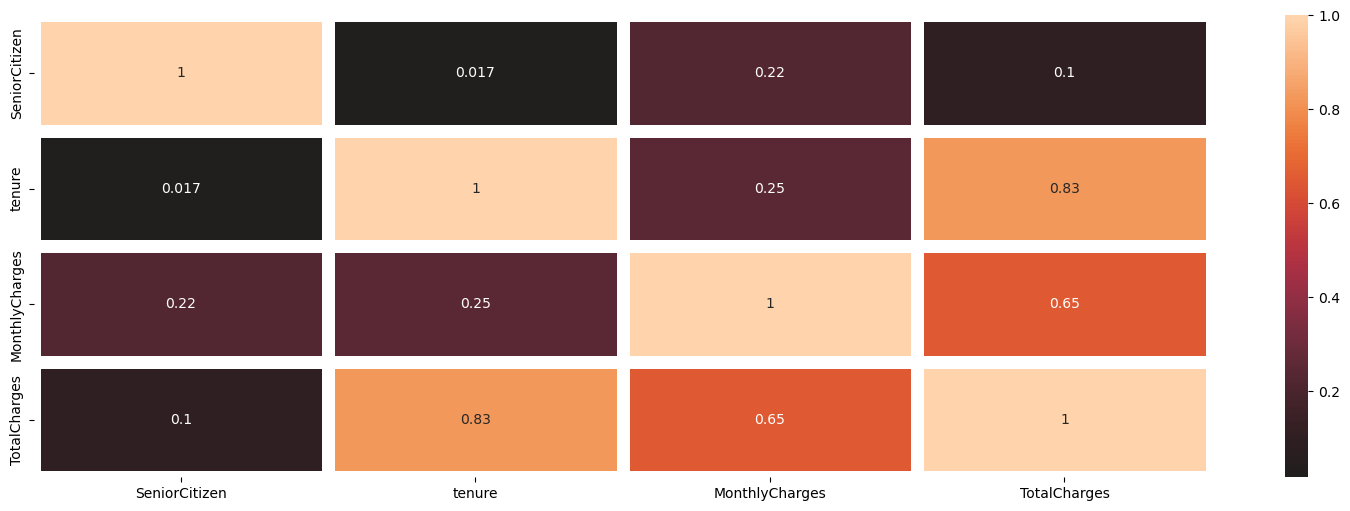

In [23]:
f, ax = plt.subplots(figsize=(19, 6))
sns.heatmap(df_data.corr(), annot=True, linewidths=8, center=0,ax=ax)

### Observations:

* The correlation coefficient between "tenure" and "TotalCharges" is approximately 0.825880, indicating a strong positive correlation.
* The correlation coefficient between "MonthlyCharges" and "TotalCharges" is approximately 0.651065, indicating a moderate positive correlation.
* The correlations between other variables are weak, which means that the variables are not strongly related to each other

In [24]:
df_data['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

### Observation

- Target distribution is Imbalanced, ratio = 73:27

In [25]:
df_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

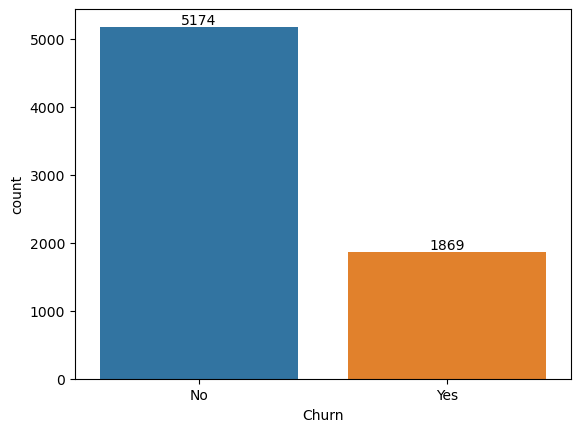

In [26]:
ax = sns.countplot(x='Churn', data=df_data)

# Add count labels to the plot
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Display the plot
plt.show()

In [27]:
pd.crosstab(df_data['gender'],df_data['Churn'], margins=True)

Churn,No,Yes,All
gender,,,
Female,2549,939,3488
Male,2625,930,3555
All,5174,1869,7043


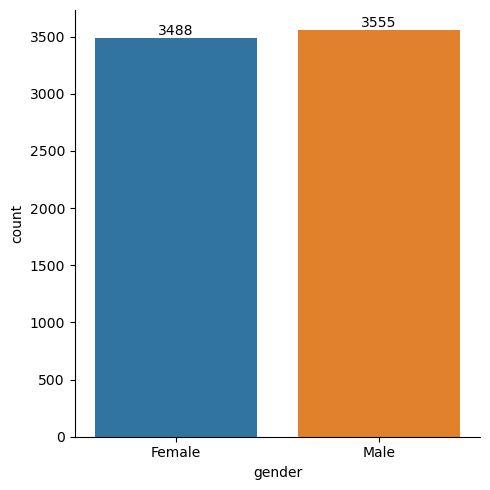

In [28]:
ax = sns.catplot(x="gender", kind="count", data=df_data)

# Add count values on top of the bars
for p in ax.ax.patches:
    ax.ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

### Observaton
* Approximately 50/50 gender ratio

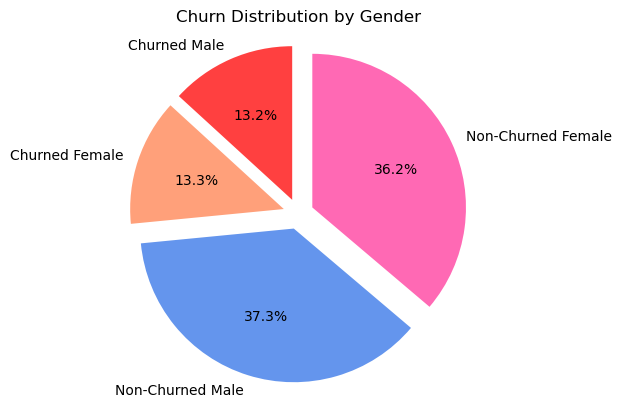

In [29]:
# Calculate the counts for each gender and churn combination
gender_churn_counts = df_data.groupby(['gender', 'Churn']).size().reset_index(name='count')

# Create a pivot table to reshape the data
pivot_table = gender_churn_counts.pivot(index='gender', columns='Churn', values='count')

# Extract the counts for churned and non-churned customers
churned_counts = pivot_table['Yes']
non_churned_counts = pivot_table['No']

# Create the pie plot
labels = ['Churned Male', 'Churned Female', 'Non-Churned Male', 'Non-Churned Female']
sizes = [churned_counts['Male'], churned_counts['Female'], non_churned_counts['Male'], non_churned_counts['Female']]
colors = ['#FF4040', '#FFA07A', '#6495ED', '#FF69B4']
explode = (0.1, 0.1, 0.1, 0.1)  # Explode slices for emphasis

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Churn Distribution by Gender')
plt.show()

### Observation

- Approximately 13.2% of males churned and 13.4% of females churned, only 0.2% of difference in both gender churned.
- Approximately 37.2% of males did not churn and 36.2% of females did not churned, 1% of difference in both gender not churned.
- Out of the total dataset of 7043 customers, 1869 customers churned, resulting in an overall churn rate of approximately 26.5%.

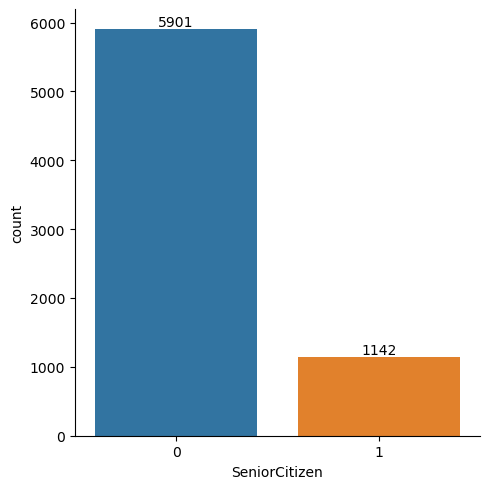

In [30]:
ax = sns.catplot(x="SeniorCitizen", kind="count", data=df_data)

# Add count values on top of the bars
for p in ax.ax.patches:
    ax.ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

### Observation
* The majority of the customer has no Senior Citizen

In [31]:
pd.crosstab(df_data['SeniorCitizen'],df_data['Churn'], margins=True)

Churn,No,Yes,All
SeniorCitizen,,,
0,4508,1393,5901
1,666,476,1142
All,5174,1869,7043


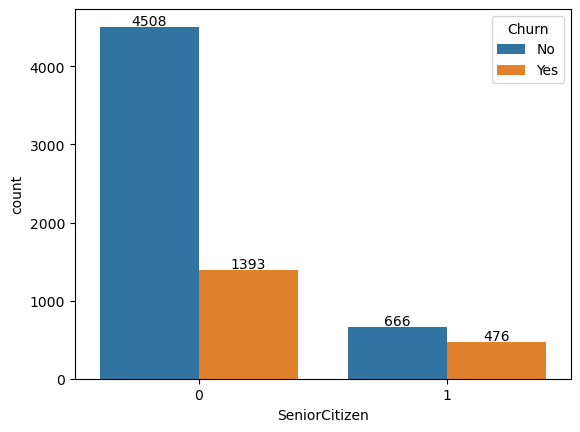

In [32]:
ax = sns.countplot(x='SeniorCitizen', hue='Churn', data=df)

# Get the total count for each category
counts = df['SeniorCitizen'].value_counts()

# Add the count labels to the plot
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 20, f'{int(height)}', ha='center')

# Display the plot
plt.show()

### Observation

- 0 means No Senior citizen, 1 Means Senior citizen
- Compare to customers who has no senior citizen churned more then customers who has senior citizen 

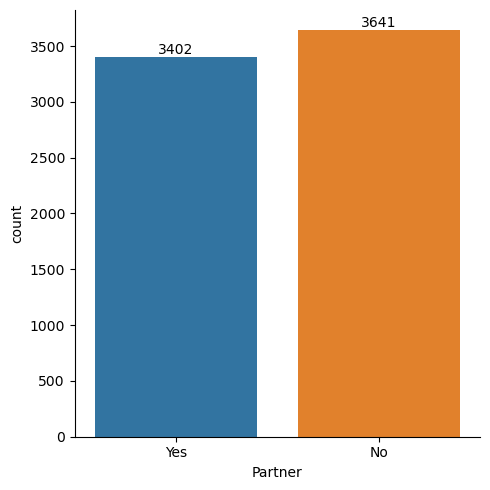

In [33]:
ax = sns.catplot(x="Partner", kind="count", data=df_data)

# Add count values on top of the bars
for p in ax.ax.patches:
    ax.ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

### Observation
* The majority of the customer has no partner

In [34]:
pd.crosstab(df_data['Partner'],df_data['Churn'], margins=True)

Churn,No,Yes,All
Partner,,,
No,2441,1200,3641
Yes,2733,669,3402
All,5174,1869,7043


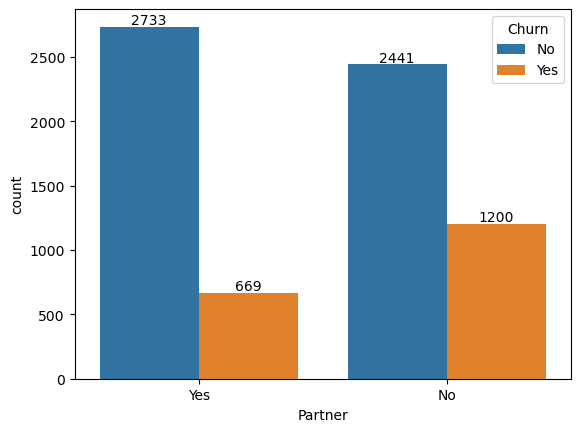

In [35]:
ax = sns.countplot(x='Partner', hue='Churn', data=df)

# Get the total count for each category
counts = df['Dependents'].value_counts()

# Add the count labels to the plot
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 20, f'{int(height)}', ha='center')

# Display the plot
plt.show()

### Observation

- The majority of customers has churned who has no partner.

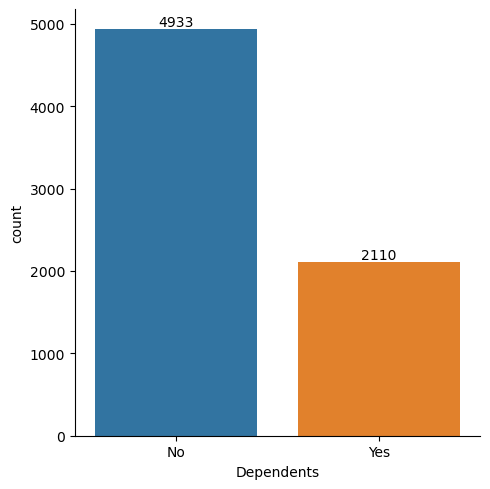

In [36]:
ax = sns.catplot(x="Dependents", kind="count", data=df_data)

# Add count values on top of the bars
for p in ax.ax.patches:
    ax.ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

### Observation

- Users who have non-dependents are approximately more than users having dependents

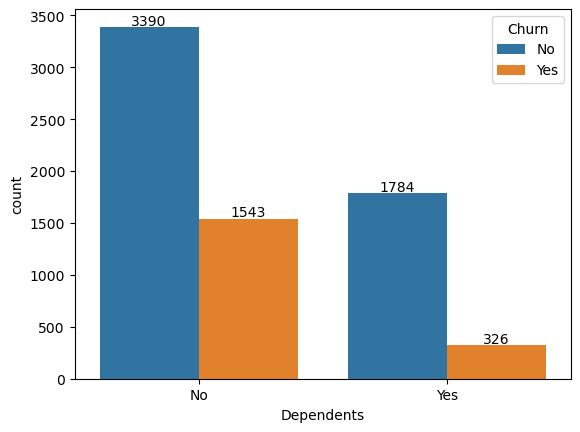

In [37]:
ax = sns.countplot(x='Dependents', hue='Churn', data=df)

# Get the total count for each category
counts = df['Dependents'].value_counts()

# Add the count labels to the plot
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 20, f'{int(height)}', ha='center')

# Display the plot
plt.show()

### Observation

- The Users churned who have non-dependents.

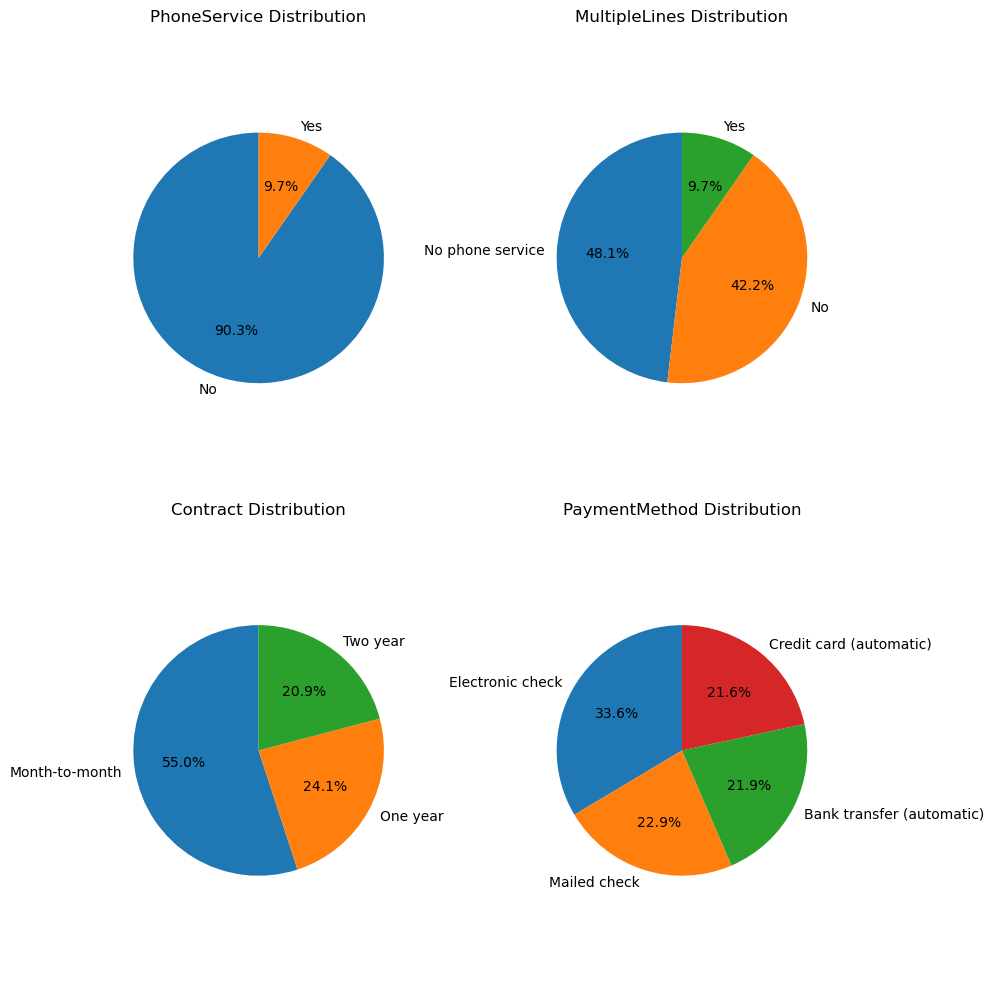

In [38]:
# Get unique labels and value counts for each variable
variables = ['PhoneService', 'MultipleLines', 'Contract', 'PaymentMethod']
labels = [df[var].unique() for var in variables]
values = [df[var].value_counts() for var in variables]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Iterate over each variable and plot a pie chart in a subplot
for ax, var, lbl, val in zip(axes.flatten(), variables, labels, values):
    ax.pie(val, labels=lbl, autopct='%1.1f%%', startangle=90)
    ax.set_title(var + ' Distribution')
    ax.axis('equal')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### Observation

- PhoneService and MultipleLines has only 9.7% distribution of yes
- Contract 55% of customers are Month to month contract followed byone year and two year.
- Payment method, majority of customers are using electonic check followed by bank transfer and credit card.

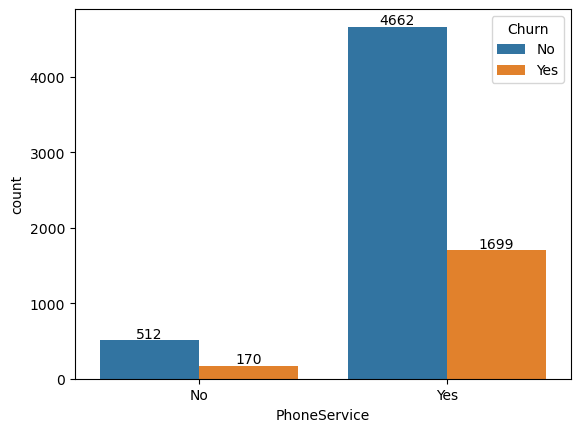

In [39]:
ax = sns.countplot(x='PhoneService', hue='Churn', data=df)

# Get the total count for each category
counts = df['PhoneService'].value_counts()

# Add the count labels to the plot
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 30, f'{int(height)}', ha='center')

# Display the plot
plt.show()

### Observation

- PhoneService, customers who has phonesercices churned more then customers who has no phoneservices.

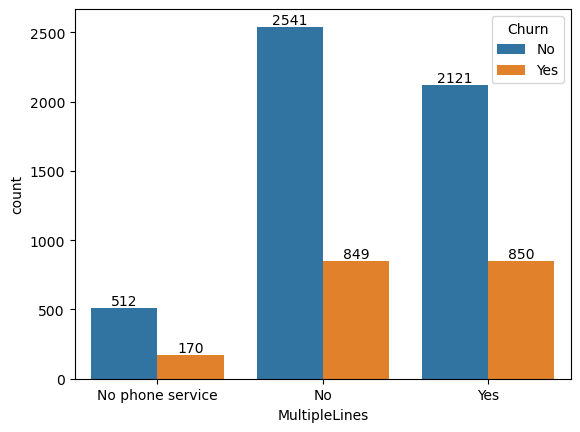

In [40]:
ax = sns.countplot(x='MultipleLines', hue='Churn', data=df)

# Get the total count for each category
counts = df['MultipleLines'].value_counts()

# Add the count labels to the plot
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 20, f'{int(height)}', ha='center')

# Display the plot
plt.show()

### Observaton
* Approximately 50/50 No and yes multiplelines ratio customers who churned

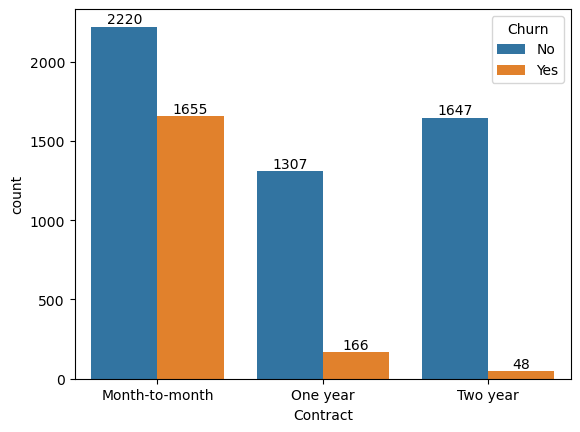

In [41]:
ax = sns.countplot(x='Contract', hue='Churn', data=df)

# Get the total count for each category
counts = df['Contract'].value_counts()

# Add the count labels to the plot
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 20, f'{int(height)}', ha='center')

# Display the plot
plt.show()

### Observaton
* Majority of customers are on month to month contract.

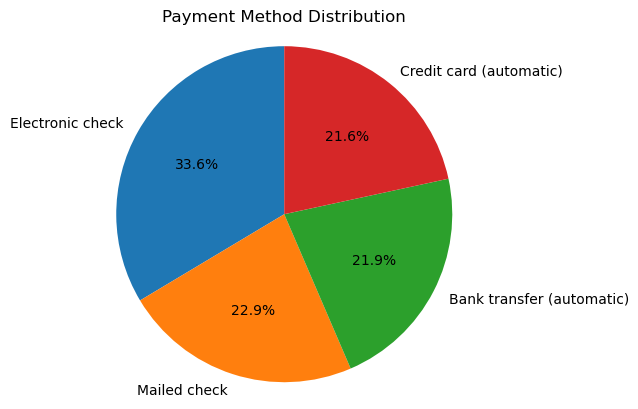

In [42]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

# Create the pie plot
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Payment Method Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### Observation
* Majority of the customers uses Electronic-check

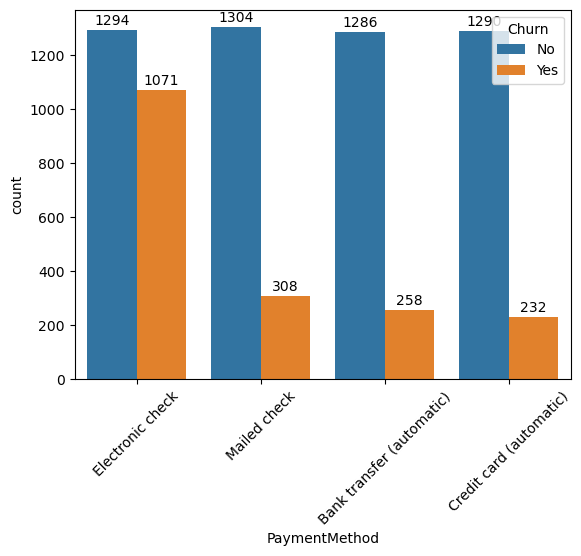

In [43]:
ax = sns.countplot(x='PaymentMethod', hue='Churn', data=df)

# Get the total count for each category
counts = df['PaymentMethod'].value_counts()

# Add the count labels to the plot
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 20, f'{int(height)}', ha='center')
plt.xticks(rotation=45)
# Display the plot
plt.show()

### Observaton
* majority of customers who churned are using electronic check.

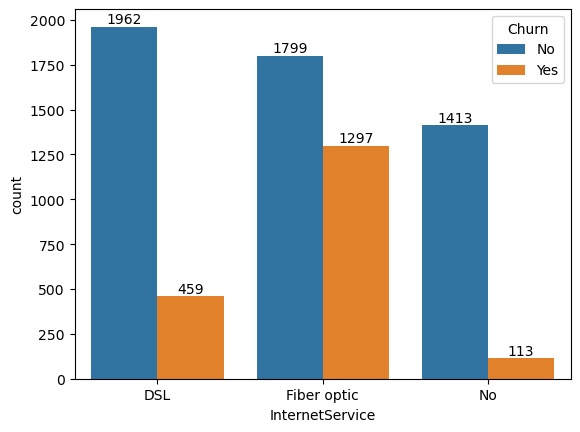

In [44]:
ax = sns.countplot(x='InternetService', hue='Churn', data=df)

# Add the count labels to the plot
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 20, f'{int(height)}', ha='center')

# Display the plot
plt.show()

### Observaton
* majority of customers who churned are using Fiber optic internet service.

In [45]:
df_data[df_data["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       993
Fiber optic      No       910
No               No       722
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
dtype: int64

In [46]:
df_data[df_data["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       969
Fiber optic      No       889
No               No       691
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
dtype: int64

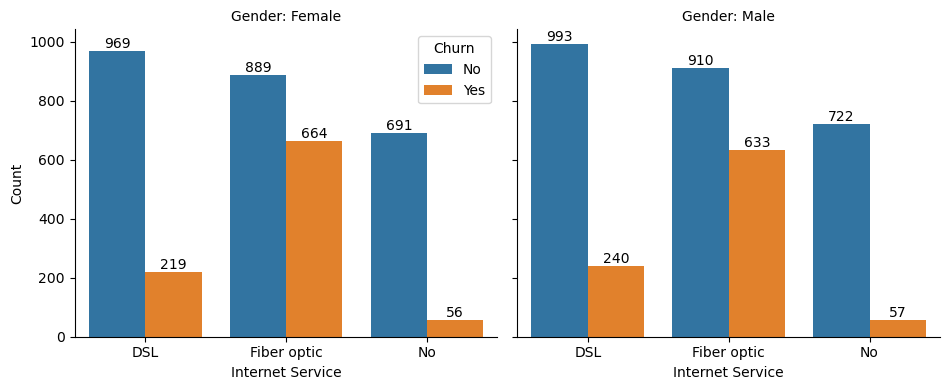

In [47]:
# Create a grouped bar plot using catplot and facet grids
g = sns.catplot(
    x='InternetService',
    hue='Churn',
    col='gender',
    data=df_data,
    kind='count',
    height=4,
    aspect=1.2,
    legend_out=False
)

# Set labels for x-axis and y-axis
g.set_axis_labels('Internet Service', 'Count')

# Set title for each subplot based on gender
g.set_titles("Gender: {col_name}")

# Add count labels to the bars
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 10, f'{int(height)}', ha='center')

# Adjust spacing between subplots
g.tight_layout()

# Display the plot
plt.show()

### Observaton
* majority of customers both genders who churned are using fiber optic internet service followed by DSL and No internet service.

In [48]:
df_data[df_data["gender"]=="Male"][["OnlineSecurity", "Churn"]].value_counts()

OnlineSecurity       Churn
No                   No       1044
Yes                  No        859
No                   Yes       740
No internet service  No        722
Yes                  Yes       133
No internet service  Yes        57
dtype: int64

In [49]:
df_data[df_data["gender"]=="Female"][["OnlineSecurity", "Churn"]].value_counts()

OnlineSecurity       Churn
No                   No       993
Yes                  No       865
No                   Yes      721
No internet service  No       691
Yes                  Yes      162
No internet service  Yes       56
dtype: int64

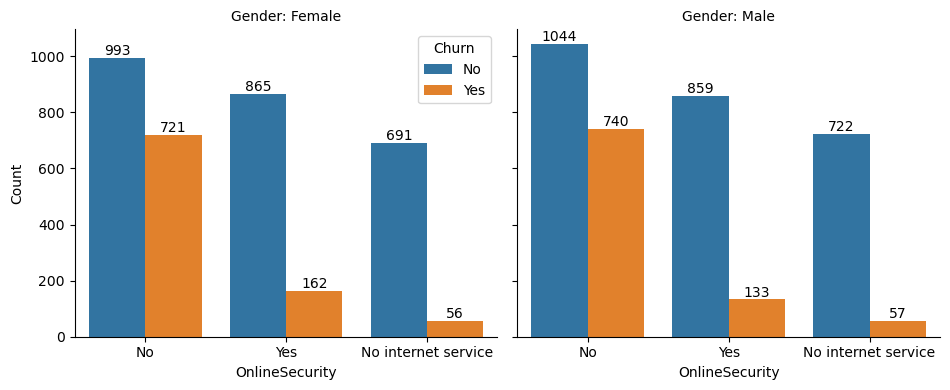

In [50]:
# Create a grouped bar plot using catplot and facet grids
g = sns.catplot(
    x='OnlineSecurity',
    hue='Churn',
    col='gender',
    data=df_data,
    kind='count',
    height=4,
    aspect=1.2,
    legend_out=False
)

# Set labels for x-axis and y-axis
g.set_axis_labels('OnlineSecurity', 'Count')

# Set title for each subplot based on gender
g.set_titles("Gender: {col_name}")

# Add count labels to the bars
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 10, f'{int(height)}', ha='center')

# Adjust spacing between subplots
g.tight_layout()

# Display the plot
plt.show()

### Observaton
* majority of customers both genders who churned has no online security.

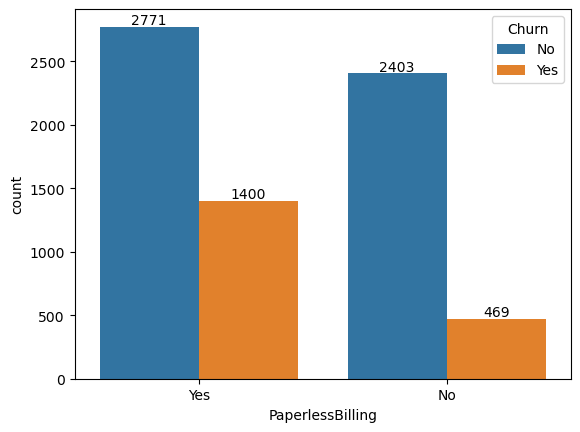

In [51]:
ax = sns.countplot(x='PaperlessBilling', hue='Churn', data=df_data)

# Add the count labels to the plot
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 20, f'{int(height)}', ha='center')

# Display the plot
plt.show()

### Observaton
* majority of customers are using paperless billing.

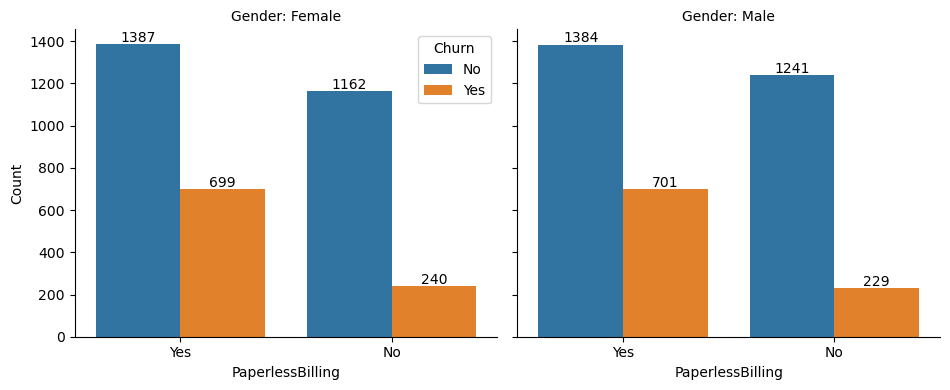

In [52]:
# Create a grouped bar plot using catplot and facet grids
g = sns.catplot(
    x='PaperlessBilling',
    hue='Churn',
    col='gender',
    data=df_data,
    kind='count',
    height=4,
    aspect=1.2,
    legend_out=False
)

# Set labels for x-axis and y-axis
g.set_axis_labels('PaperlessBilling', 'Count')

# Set title for each subplot based on gender
g.set_titles("Gender: {col_name}")

# Add count labels to the bars
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 10, f'{int(height)}', ha='center')

# Adjust spacing between subplots
g.tight_layout()

# Display the plot
plt.show()

### Observaton
* majority of customers both genders who churned are using paperless billing.

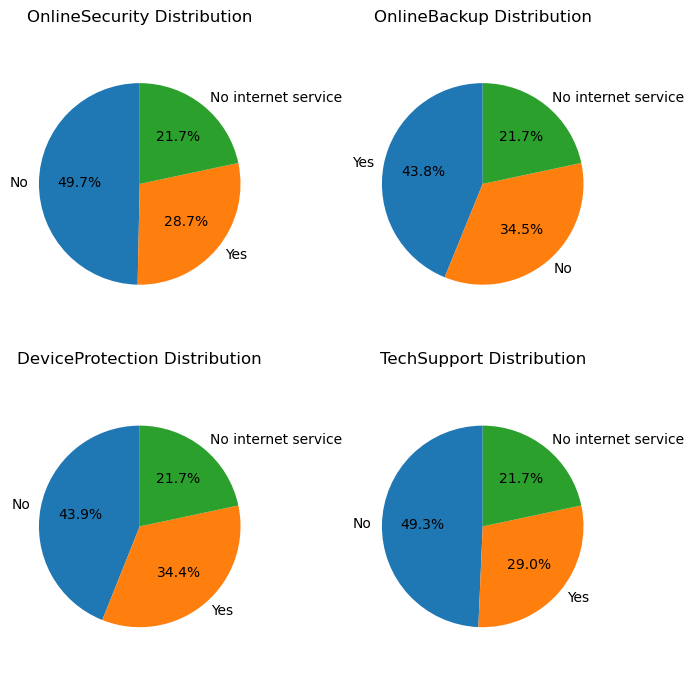

In [53]:
# Get unique labels and value counts for each variable
variables = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
labels = [df[var].unique() for var in variables]
values = [df[var].value_counts() for var in variables]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(7, 7))

# Iterate over each variable and plot a pie chart in a subplot
for ax, var, lbl, val in zip(axes.flatten(), variables, labels, values):
    ax.pie(val, labels=lbl, autopct='%1.1f%%', startangle=90)
    ax.set_title(var + ' Distribution')
    ax.axis('equal')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### Observation

- 'Online Backup', 'Device Protection','Online Security', and  'Tech Support' has similar churned distribution

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

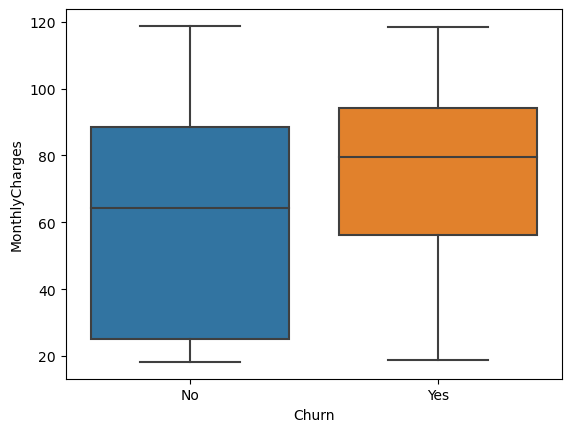

In [54]:
sns.boxplot(df_data, x="Churn", y="MonthlyCharges")

### Observations:

* MonthlyCharges : We can see there are no outliers

<Axes: xlabel='Churn', ylabel='TotalCharges'>

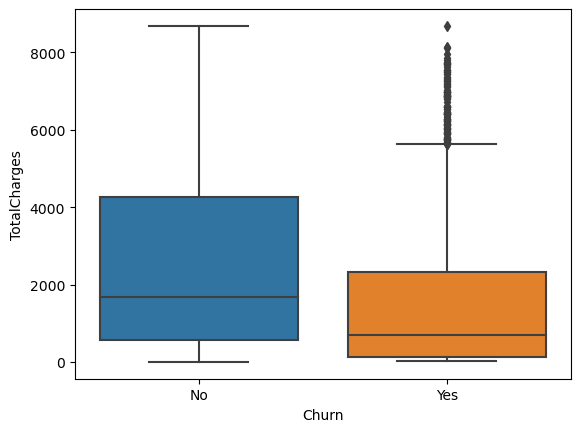

In [55]:
sns.boxplot(df_data, x="Churn", y="TotalCharges")

### Observations:

* TotalCharges has outliers and are much impacted outliers

<Axes: xlabel='Churn', ylabel='tenure'>

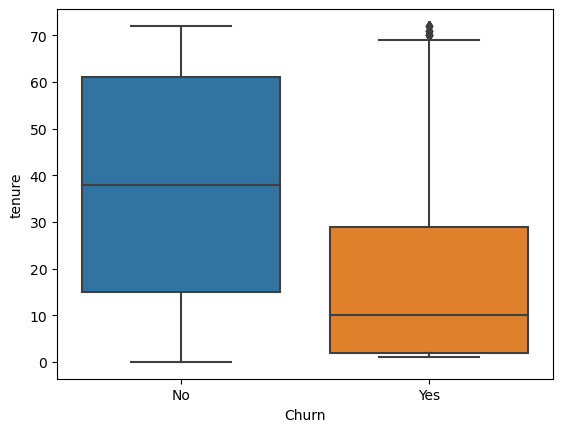

In [56]:
sns.boxplot(df_data, x="Churn", y="tenure")

### Observations:

* tenure has outliers and are not impacted outliers (As the skewness value is 0.239540 which is in between -0.5 to 0.5)

Dropping the tenure which has zero value

In [57]:
df_data.drop(labels=df_data[df_data['tenure'] == 0].index, axis=0, inplace=True)

Converting the Senior citizen into categorical

In [58]:
df_data['SeniorCitizen'] = df_data['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

## Data Preparation

- Train Test Split
- Encoding for Categorical Columns 
   - Nominal : OneHotEncoding
- Encoding for Numerical Columns
    - Standardization

**Steps followed below for ML modeling:**  
- Identify the Target Variable and Splitting the Data into train and test  
- Separating Categorical and Numerical Columns  
- Rescaling Numerical Columns (Standardization)  
- Applying OneHotEncoding on Categorical Columns  
- Concatinating the Encoded Categorical Features and Scaled Numerical Features 

* Input Variables are X = gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges
* Target var Y = Churn
* Historical data -> Yes
* Is target var available in Historical data -> Yes
* Type -> Supervised Learning
* Task -> Classification
* Algorithms -> KNN, Logistic Regression, Support Vector Machines, Decision Trees and Random Forest
* Evaluation Metrics -> Accuracy

### Separating Inputs and Outputs

In [59]:
Y=df_data['Churn']
X=df_data[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService',
           'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','Contract','PaperlessBilling',
           'PaymentMethod','MonthlyCharges','TotalCharges']]

### Train and Test Split

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=200)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(5274, 18) (5274,)
(1758, 18) (1758,)


### Separating Categorical and Numerical Columns:

In [61]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod
1631,Female,Yes,Yes,No,Yes,Yes,Fiber optic,Yes,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic)
6395,Male,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,One year,Yes,Electronic check
1653,Male,No,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
4206,Female,No,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
6927,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Month-to-month,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863,Male,No,No,No,Yes,No,DSL,No,No,No,No,No,Month-to-month,No,Mailed check
5965,Male,No,Yes,Yes,Yes,No,DSL,Yes,No,Yes,No,No,One year,Yes,Credit card (automatic)
786,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,No,No,No,Two year,No,Bank transfer (automatic)
4721,Male,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check


In [62]:
X_train_num = X_train.select_dtypes(include=['int64','float64'])
X_train_num

,tenure,MonthlyCharges,TotalCharges
1631,17,85.35,1463.45
6395,41,102.60,4213.35
1653,58,20.75,1185.95
4206,72,116.80,8456.75
6927,5,64.40,316.90
...,...,...,...
2863,1,44.60,44.60
5965,36,63.70,2188.50
786,72,55.30,3983.60
4721,1,20.25,20.25


### Scaling the numerical features

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,tenure,MonthlyCharges,TotalCharges
1631,-0.624697,0.698746,-0.354216
6395,0.353005,1.273366,0.864815
1653,1.045544,-1.453165,-0.477232
4206,1.615871,1.746387,2.745916
6927,-1.113548,0.000874,-0.862482


In [64]:
X_train_num.describe()

,tenure,MonthlyCharges,TotalCharges
count,5274.000000,5274.000000,5274.000000
mean,32.334661,64.373777,2262.493193
std,24.549676,30.022675,2256.021296
min,1.000000,18.250000,18.800000
25%,9.000000,35.162500,400.075000
50%,29.000000,70.050000,1384.175000
75%,55.000000,89.550000,3729.750000
max,72.000000,118.650000,8684.800000


In [65]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 3
Mean of each column: [  32.3346606    64.37377702 2262.49319302]
Std of each column: [  24.54734818   30.01982828 2255.80740475]


In [66]:
X_train_cat

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod
1631,Female,Yes,Yes,No,Yes,Yes,Fiber optic,Yes,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic)
6395,Male,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,One year,Yes,Electronic check
1653,Male,No,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
4206,Female,No,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
6927,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Month-to-month,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863,Male,No,No,No,Yes,No,DSL,No,No,No,No,No,Month-to-month,No,Mailed check
5965,Male,No,Yes,Yes,Yes,No,DSL,Yes,No,Yes,No,No,One year,Yes,Credit card (automatic)
786,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,No,No,No,Two year,No,Bank transfer (automatic)
4721,Male,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check


### OneHotEncoding the categorical features

In [67]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)


X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

C:\Users\yousu\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1631,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6395,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1653,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4206,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
6927,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [68]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)
X_train_transformed

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1631,-0.624697,0.698746,-0.354216,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6395,0.353005,1.273366,0.864815,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1653,1.045544,-1.453165,-0.477232,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4206,1.615871,1.746387,2.745916,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
6927,-1.113548,0.000874,-0.862482,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863,-1.276499,-0.658691,-0.983193,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5965,0.149317,-0.022444,-0.032801,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
786,1.615871,-0.302259,0.762967,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4721,-1.276499,-1.469821,-0.993987,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Preparing Test Data

In [69]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2123,Male,No,No,No,31,Yes,Yes,Fiber optic,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.45,2429.10
3442,Male,No,No,No,29,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),98.80,2807.10
6808,Male,No,No,No,39,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,Two year,Yes,Electronic check,100.45,3801.70
6852,Male,No,Yes,Yes,44,Yes,No,DSL,No,Yes,Yes,Yes,No,Month-to-month,Yes,Mailed check,61.90,2924.05
1479,Female,No,No,No,44,No,No phone service,DSL,No,No,Yes,No,Yes,One year,Yes,Electronic check,49.05,2265.00


In [70]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod
2123,Male,No,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Month-to-month,Yes,Electronic check
3442,Male,No,No,No,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic)
6808,Male,No,No,No,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,Two year,Yes,Electronic check
6852,Male,No,Yes,Yes,Yes,No,DSL,No,Yes,Yes,Yes,No,Month-to-month,Yes,Mailed check
1479,Female,No,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,One year,Yes,Electronic check


In [71]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,tenure,MonthlyCharges,TotalCharges
2123,31,80.45,2429.10
3442,29,98.80,2807.10
6808,39,100.45,3801.70
6852,44,61.90,2924.05
1479,44,49.05,2265.00


In [72]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,tenure,MonthlyCharges,TotalCharges
2123,-0.054371,0.535520,0.073857
3442,-0.135846,1.146783,0.241424
6808,0.271530,1.201746,0.682331
6852,0.475218,-0.082405,0.293268
1479,0.475218,-0.510455,0.001111


In [73]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2123,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3442,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
6808,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
6852,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1479,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [74]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2123,-0.054371,0.535520,0.073857,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3442,-0.135846,1.146783,0.241424,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
6808,0.271530,1.201746,0.682331,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
6852,0.475218,-0.082405,0.293268,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1479,0.475218,-0.510455,0.001111,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


# Model Building

### KNN

In [75]:
knn_model = KNeighborsClassifier(n_neighbors = 31) 
knn_model.fit(X_train_transformed, Y_train)
knn_predicted_y = knn_model.predict(X_test_transformed)

accuracy_knn = knn_model.score(X_test_transformed, Y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7969283276450512


In [76]:
print(accuracy_score(Y_test, knn_predicted_y))

print(classification_report(Y_test, knn_predicted_y))

0.7969283276450512
              precision    recall  f1-score   support

          No       0.85      0.88      0.86      1283
         Yes       0.63      0.59      0.61       475

    accuracy                           0.80      1758
   macro avg       0.74      0.73      0.74      1758
weighted avg       0.79      0.80      0.79      1758



In [77]:
print(metrics.confusion_matrix(Y_test, knn_predicted_y))

[[1123  160]
 [ 197  278]]


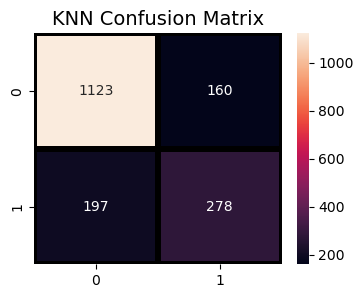

In [78]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, knn_predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN Confusion Matrix",fontsize=14)
plt.show()

### Logistic Regression

In [79]:
lr_model = LogisticRegression()
lr_model.fit(X_train_transformed, Y_train)

lr_predicted_y= lr_model.predict(X_test_transformed)
accuracy_lr = lr_model.score(X_test_transformed,Y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8031854379977247


In [80]:
print(accuracy_score(Y_test, lr_predicted_y))

print(classification_report(Y_test, lr_predicted_y))

0.8031854379977247
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1283
         Yes       0.66      0.55      0.60       475

    accuracy                           0.80      1758
   macro avg       0.75      0.72      0.74      1758
weighted avg       0.79      0.80      0.80      1758



In [81]:
print(metrics.confusion_matrix(Y_test, lr_predicted_y))

[[1150  133]
 [ 213  262]]


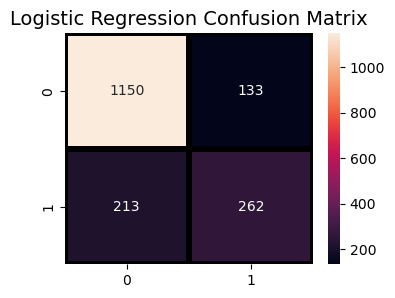

In [82]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, lr_predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Logistic Regression Confusion Matrix",fontsize=14)
plt.show()

### SVC

In [83]:
svc_model = SVC()
svc_model.fit(X_train_transformed, Y_train)
svc_predicted_y = svc_model.predict(X_test_transformed)
accuracy_svc = svc_model.score(X_test_transformed,Y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7974971558589306


In [84]:
print(accuracy_score(Y_test, svc_predicted_y))
print(classification_report(Y_test, svc_predicted_y))

0.7974971558589306
              precision    recall  f1-score   support

          No       0.83      0.92      0.87      1283
         Yes       0.68      0.48      0.56       475

    accuracy                           0.80      1758
   macro avg       0.75      0.70      0.71      1758
weighted avg       0.79      0.80      0.79      1758



In [85]:
print(metrics.confusion_matrix(Y_test, svc_predicted_y))

[[1176  107]
 [ 249  226]]


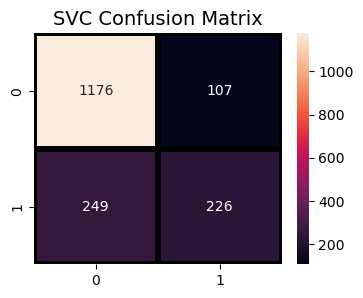

In [86]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, svc_predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SVC Confusion Matrix",fontsize=14)
plt.show()

### Decision Tree

In [87]:
dt_model = DecisionTreeClassifier(criterion = "gini",max_depth=6, min_samples_leaf=8)
dt_model.fit(X_train_transformed, Y_train)

dt_predicted_y = dt_model.predict(X_test_transformed)
accuracy_dt = dt_model.score(X_test_transformed,Y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7838452787258248


In [88]:
print(accuracy_score(Y_test, dt_predicted_y))

print(classification_report(Y_test, dt_predicted_y))

0.7838452787258248
              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1283
         Yes       0.63      0.49      0.55       475

    accuracy                           0.78      1758
   macro avg       0.73      0.69      0.71      1758
weighted avg       0.77      0.78      0.78      1758



In [89]:
print(metrics.confusion_matrix(Y_test, dt_predicted_y))

[[1143  140]
 [ 240  235]]


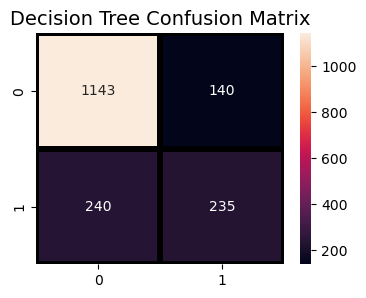

In [90]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, dt_predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Decision Tree Confusion Matrix",fontsize=14)
plt.show()

### Random Forest

In [91]:
model_rf = RandomForestClassifier(criterion = "gini",max_depth=6, min_samples_leaf=8)
model_rf.fit(X_train_transformed, Y_train)

# Make predictions
rf_predicted_y = model_rf.predict(X_test_transformed)
accuracy_rf = model_rf.score(X_test_transformed,Y_test)
print("Random Forest accuracy is :",accuracy_rf)

Random Forest accuracy is : 0.7901023890784983


In [92]:
print("Random Forest accuracy is :", accuracy_score(Y_test, rf_predicted_y))
print(classification_report(Y_test, rf_predicted_y))

Random Forest accuracy is : 0.7901023890784983
              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1283
         Yes       0.66      0.46      0.54       475

    accuracy                           0.79      1758
   macro avg       0.74      0.69      0.70      1758
weighted avg       0.78      0.79      0.78      1758



In [93]:
print(metrics.confusion_matrix(Y_test, rf_predicted_y))

[[1171  112]
 [ 257  218]]


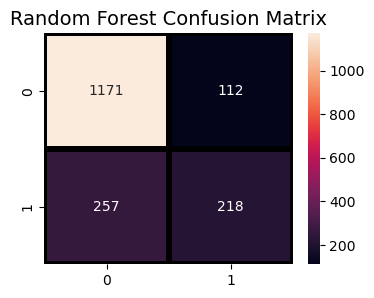

In [94]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, rf_predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Random Forest Confusion Matrix",fontsize=14)
plt.show()

### Ada Boost

In [95]:
adbc = AdaBoostClassifier()
adbc.fit(X_train_transformed, Y_train)
adbc_predicted_y = adbc.predict(X_test_transformed)

accuracy_adbc = adbc.score(X_test_transformed,Y_test)
print("Ada Boost Classifier accuracy:",accuracy_adbc)

Ada Boost Classifier accuracy: 0.8043230944254836


In [96]:
print(accuracy_score(Y_test, adbc_predicted_y))

print(classification_report(Y_test, adbc_predicted_y))

0.8043230944254836
              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1283
         Yes       0.66      0.56      0.61       475

    accuracy                           0.80      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.80      0.80      1758



In [97]:
print(metrics.confusion_matrix(Y_test, adbc_predicted_y))

[[1146  137]
 [ 207  268]]


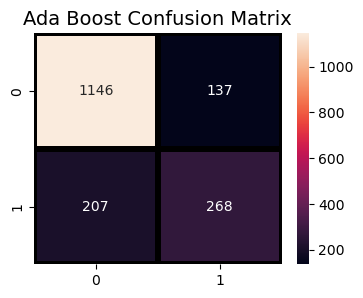

In [98]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, adbc_predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Ada Boost Confusion Matrix",fontsize=14)
plt.show()

# Conclusion

* Both Logistic Regression and Ada boost has got an accuracy of 80%, 
* From the confusion matrix of Ada Boost we can see that: There are total 1146+137=1283 actual non-churn values and the algorithm predicts 1146 of them as non churn and 137 of them as churn. While there are 207+268=475 actual churn values and the algorithm predicts 207 of them as non churn values and 268 of them as churn values.
* But the accuracy is low, and it's an imbalanced dataset, so we shouldn't only consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
* So, we need to also check the recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class yes, i.e. churned customers.